# Imports

In [1]:
import pickle
import numpy as np
from random import shuffle
from agent_code.my_agent.algorithms import *
from settings import s
import time
import matplotlib.pyplot as plt
import copy
import os

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


# Training Weights from Simple Agent

In [3]:
def train_game(data, weights, alpha, gamma):
    for i in range(len(data)-1):
        prev_state = data[i]['state']
        prev_action = data[i]['action']
        next_state = data[i+1]['state']
        next_action = data[i+1]['action']
        
        reward = -1
        
        if data[i]['state']['step'] != 1:
            for event in data[i]['events']:
                if event == e.BOMB_DROPPED:
                    reward += 1
                elif event == e.COIN_COLLECTED:
                    reward += 100
                elif event == e.KILLED_SELF:
                    reward -= 100
                elif event == e.CRATE_DESTROYED:
                    reward += 10
                elif event == e.COIN_FOUND:
                    reward += 30
                elif event == e.KILLED_OPPONENT:
                    reward += 300
                elif event == e.GOT_KILLED:
                    reward -= 300
                elif event == e.SURVIVED_ROUND:
                    reward += 100
                elif event == e.INVALID_ACTION:
                    reward -= 2


                
        
        f0 = np.ones(6)  # for bias
        f1 = feature1(next_state) # reward good action
        f2 = feature2(next_state) # penalization bad action
        f3 = feature3(next_state)
        f4 = feature4(next_state) # reward good action
        f5 = feature5(next_state)  # penalize bad action
        f6 = feature6(next_state)  # reward good action
        f7 = feature7(next_state) # reward action
        #f8 = feature8(next_state) # rewards good action
        f9 = feature9(next_state) # rewards good action
        f10 = feature10(next_state) # rewards good action
        f11 = feature11(next_state)
        f12 = feature12(next_state)
        f13 = feature13(next_state)
        f14 = feature14(next_state)
        f15 = feature15(next_state)
        next_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
          
        f0 = np.ones(6)  # for bias
        f1 = feature1(prev_state) # reward good action
        f2 = feature2(prev_state) # penalization bad action
        f3 = feature3(prev_state)
        f4 = feature4(prev_state) # reward good action
        f5 = feature5(prev_state)  # penalize bad action
        f6 = feature6(prev_state)  # reward good action
        f7 = feature7(prev_state) # reward action
        #f8 = feature8(prev_state) # rewards good action
        f9 = feature9(prev_state) # rewards good action
        f10 = feature10(prev_state) # rewards good action
        f11 = feature11(prev_state)
        f12 = feature12(prev_state)
        f13 = feature13(prev_state)
        f14 = feature14(prev_state)
        f15 = feature15(prev_state)
        prev_state = np.vstack((f0,f1,f2,f3,f4,f5,f6,f7,f9,f10,f11,f12,f13,f14,f15)).T
        
        prev_sa = prev_state[s.actions.index(prev_action),:]
        
        new_weights = q_gd_linapprox(next_state, prev_sa, reward, 
                                     weights, alpha, gamma)
        weights = new_weights
        
        alpha = 1/data[i]['state']['step']
        #gamma = gamma**data[i]['state']['step']
        
    return weights   

In [ ]:
alpha = 0.2
gamma = 0.95
weights1 = np.ones(15)
for file in os.listdir('data-collect'):
   if file.__contains__('game_'):
        print(file)
        f = open('data-collect/'+file, 'rb')
        data = sorted(pickle.load(f), key = lambda k: k['state']['step'])
        weights1 = train_game(data, weights, alpha, gamma)
        

# Training Results

In [4]:
from jupyterthemes import jtplot
jtplot.reset()

In [31]:
os.listdir('training_res/res_2')
#np.load('training_res/res_2/train_rewards_EpsGreedy_initX.npy')

['train_rewards_EpsGreedy_initX.npy',
 'train_rewards_Greed_initX.npy',
 'train_rewards_n_step_EpsGreed_initX.npy',
 'train_rewards_n_step_Greed_initX.npy',
 'train_weights_EpsGreedy_initX.npy',
 'train_weights_Greed_initX.npy',
 'train_weights_n_step_EpsGreed_initX.npy',
 'train_weights_n_step_Greed_initX.npy',
 'weights_EpsGreedy_initX.npy',
 'weights_Greed_initX.npy',
 'weights_n_step_EpsGreed_initX.npy']

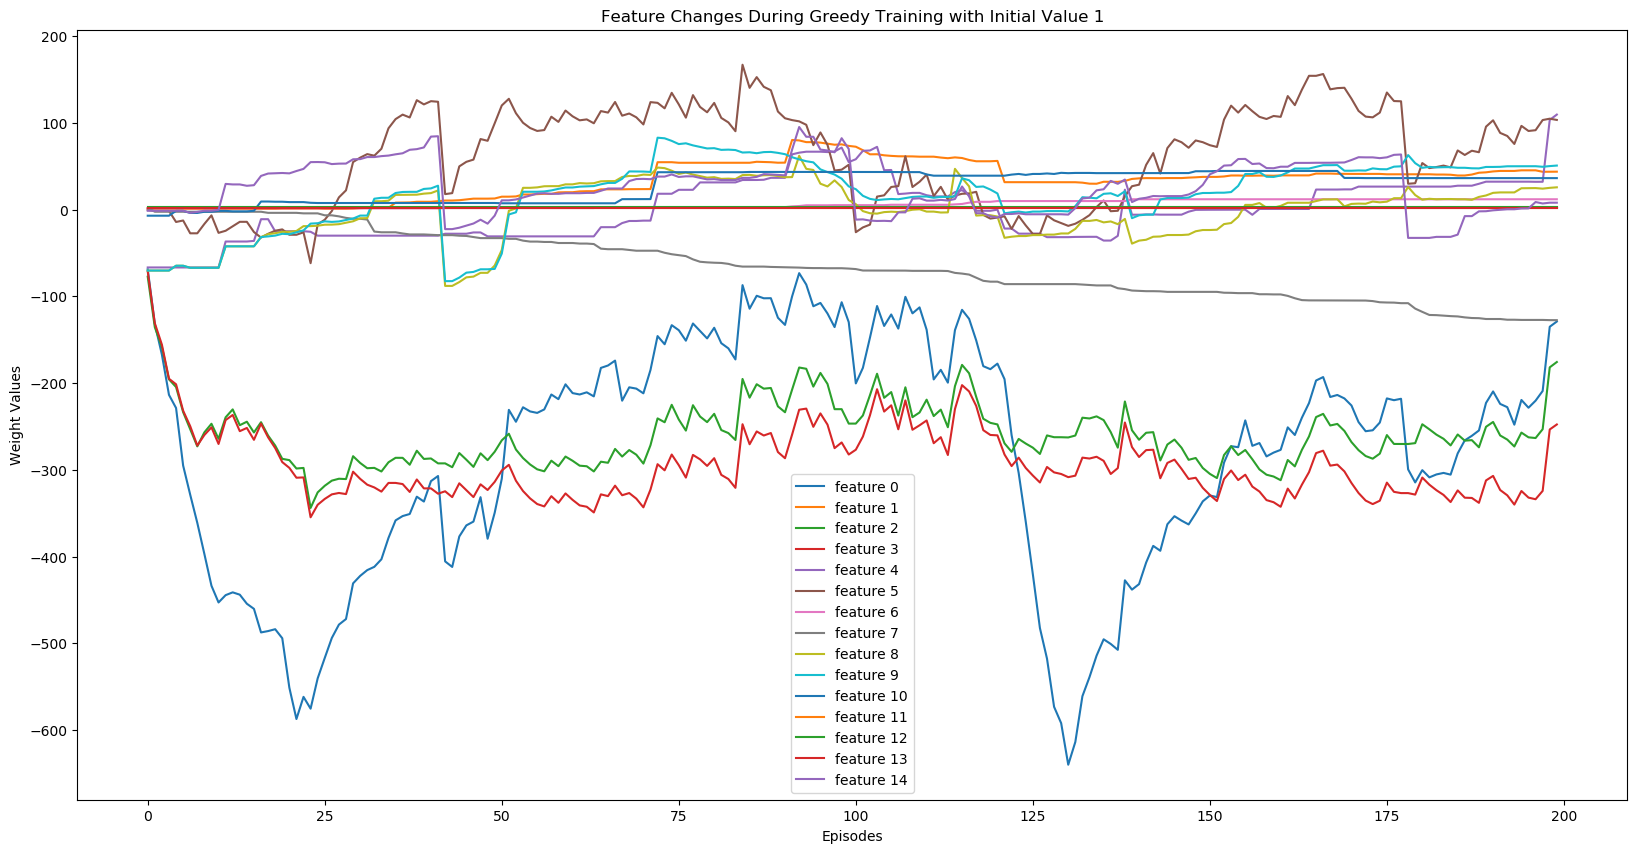

[-559.34570833   -0.56114572 -256.61420553 -312.05189646   -7.12338946
  146.13308174   68.0798356  -188.0508605    11.00629559   48.91868198
   65.90555143    1.5         -34.8793913   -43.66690559   46.3921951 ]


In [58]:
y1 = np.load('training_res/res_2/train_weights_EpsGreedy_initX.npy')
y2 = np.load('training_res/res_2/train_rewards_EpsGreedy_initX.npy')
y1 = y1.reshape(1498, 15)
x = np.arange(200)
#y[:,1000]

plt.figure(figsize=(20, 10))
for feat in range(15):
    plt.plot(x, y1[0:200,feat], label='feature {}'.format(feat))
#plt.plot(x,y2)
plt.title('Feature Changes During Greedy Training with Initial Value 1')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/res_2/weights_EpsGreedy_initX.npy'))

No handles with labels found to put in legend.


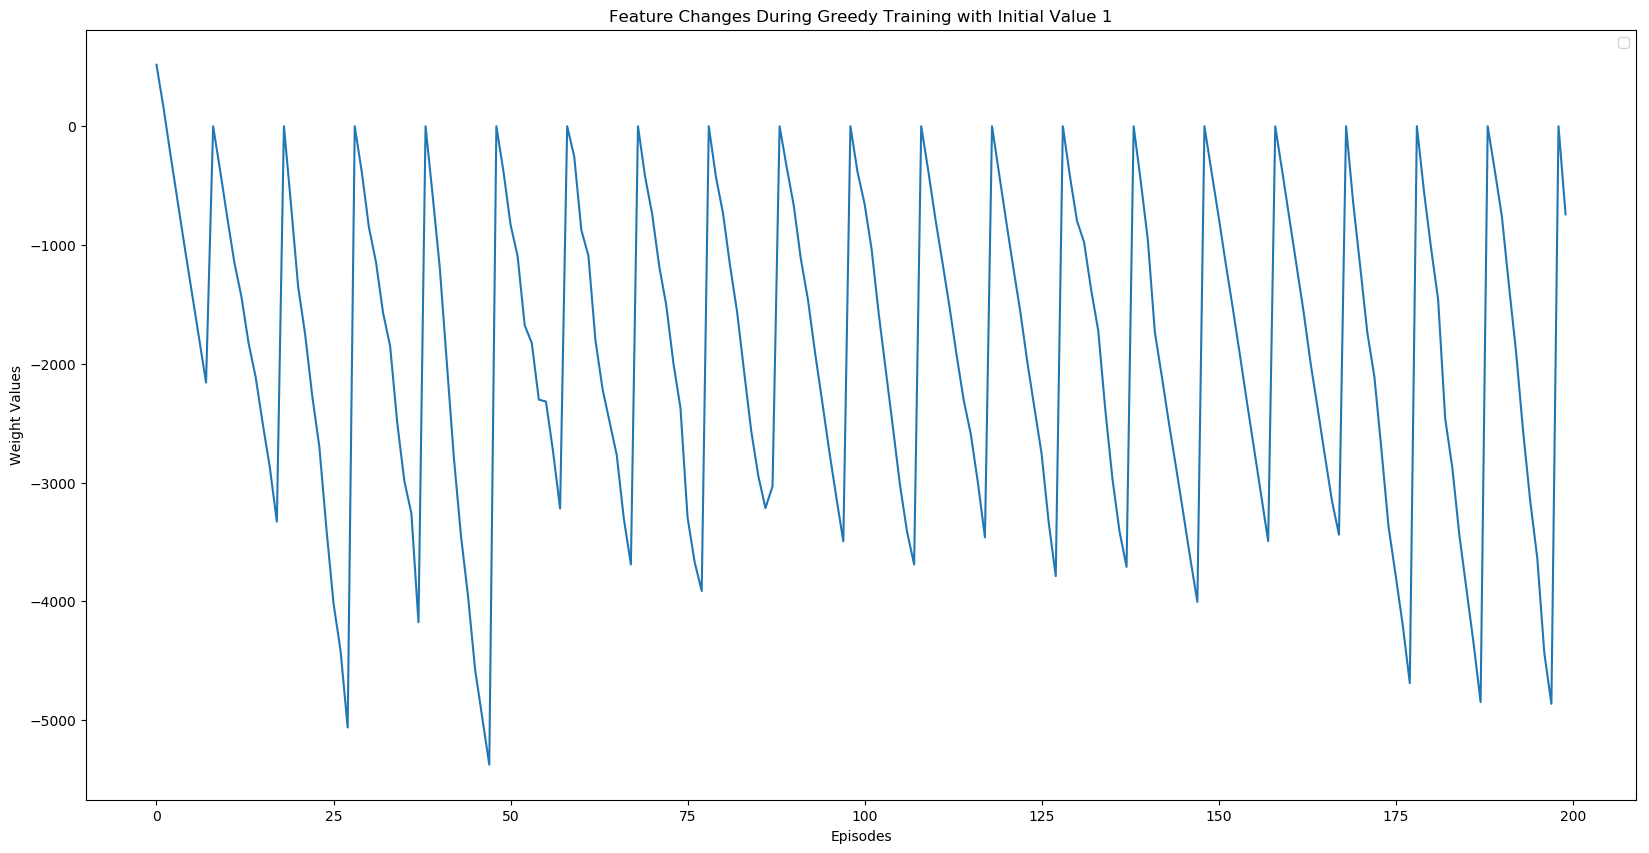

[-473.62266276  -23.41192508 -445.72658089 -341.77416292   -6.6826041
  129.19142884   13.70668701 -119.44368768  -65.12174971   84.76256514
    2.1781089     1.5           2.51733282    2.42789165   22.551603  ]


In [59]:
y1 = np.load('training_res/train_weights_EpsGreedy_initX.npy')
y2 = np.load('training_res/train_rewards_EpsGreedy_initX.npy')
y1 = y1.reshape(200, 15)
x = np.arange(200)
#y[:,1000]

plt.figure(figsize=(20, 10))
#for feat in range(15):
#    plt.plot(x, y1[:,feat], label='feature {}'.format(feat))
plt.plot(x,y2)
plt.title('Feature Changes During Greedy Training with Initial Value 1')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/weights_EpsGreedy_initX.npy'))

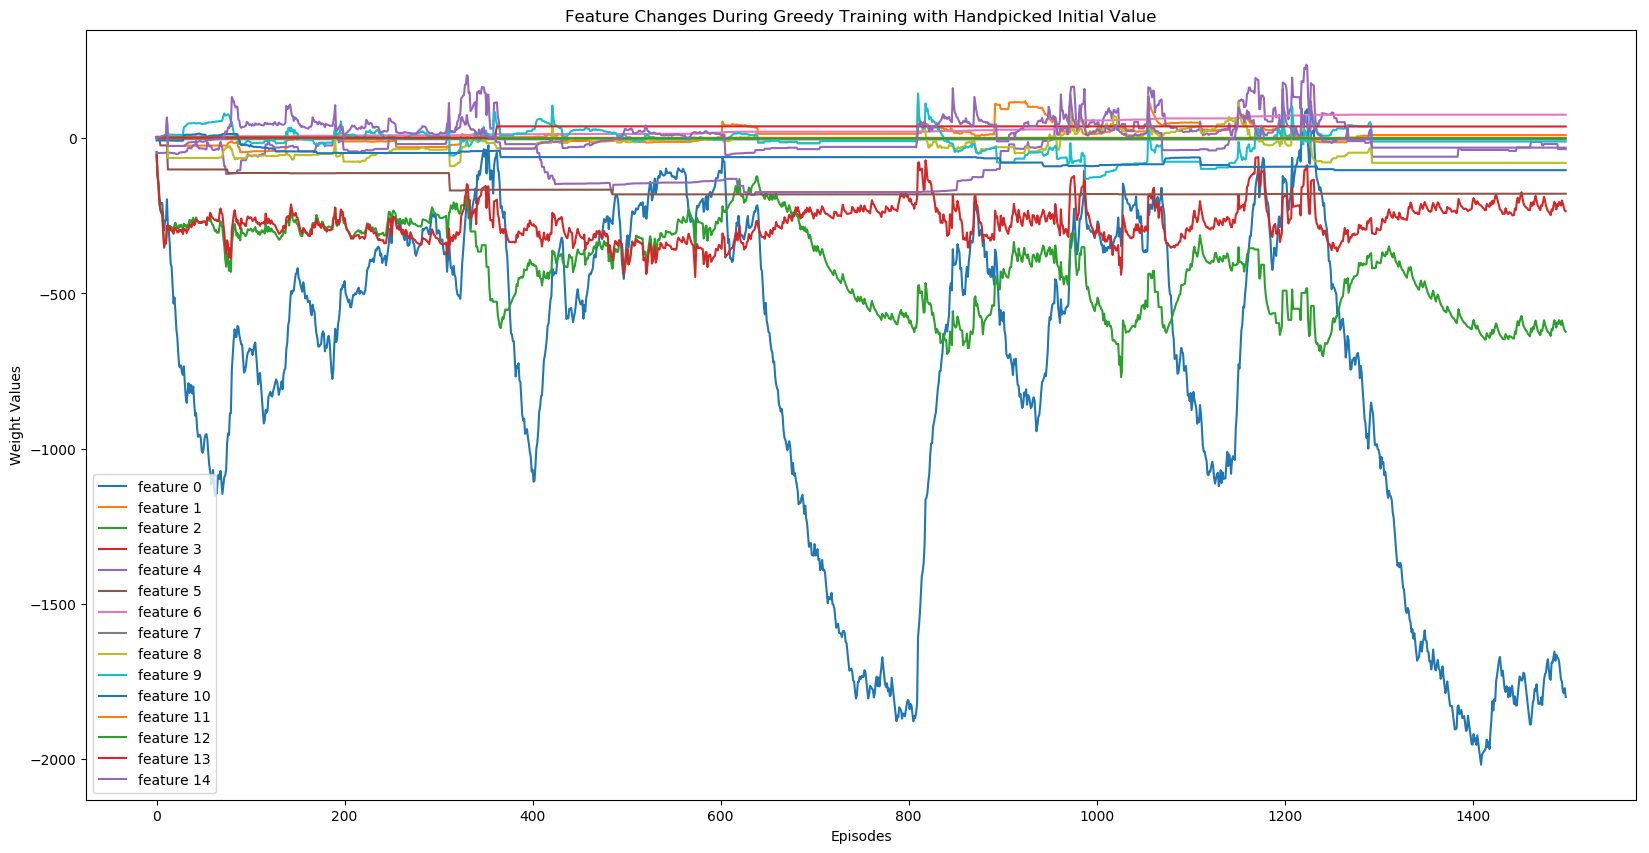

[-1.79983248e+03  1.04818427e+01 -6.23323812e+02 -2.34768381e+02
 -3.49865660e+01 -1.78611860e+02  7.60374732e+01 -3.84916802e+00
 -7.91504659e+01 -1.04612455e+01 -1.02735595e+02  1.50000000e+00
 -7.60963290e-02  3.79247106e+01 -3.01359196e+01]


In [40]:
y1 = np.load('training_res/res_2/train_weights_Greed_initX.npy')
y2 = np.load('training_res/res_2/train_rewards_Greed_initX.npy')
y1 = y1.reshape(1500, 15)
x = np.arange(1500)
#y[:,1000]

plt.figure(figsize=(20, 10))
for feat in range(15):
    plt.plot(x, y1[:,feat], label='feature {}'.format(feat))
#plt.plot(x,y2)
plt.title('Feature Changes During Greedy Training with Handpicked Initial Value')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/res_2/weights_Greed_initX.npy'))

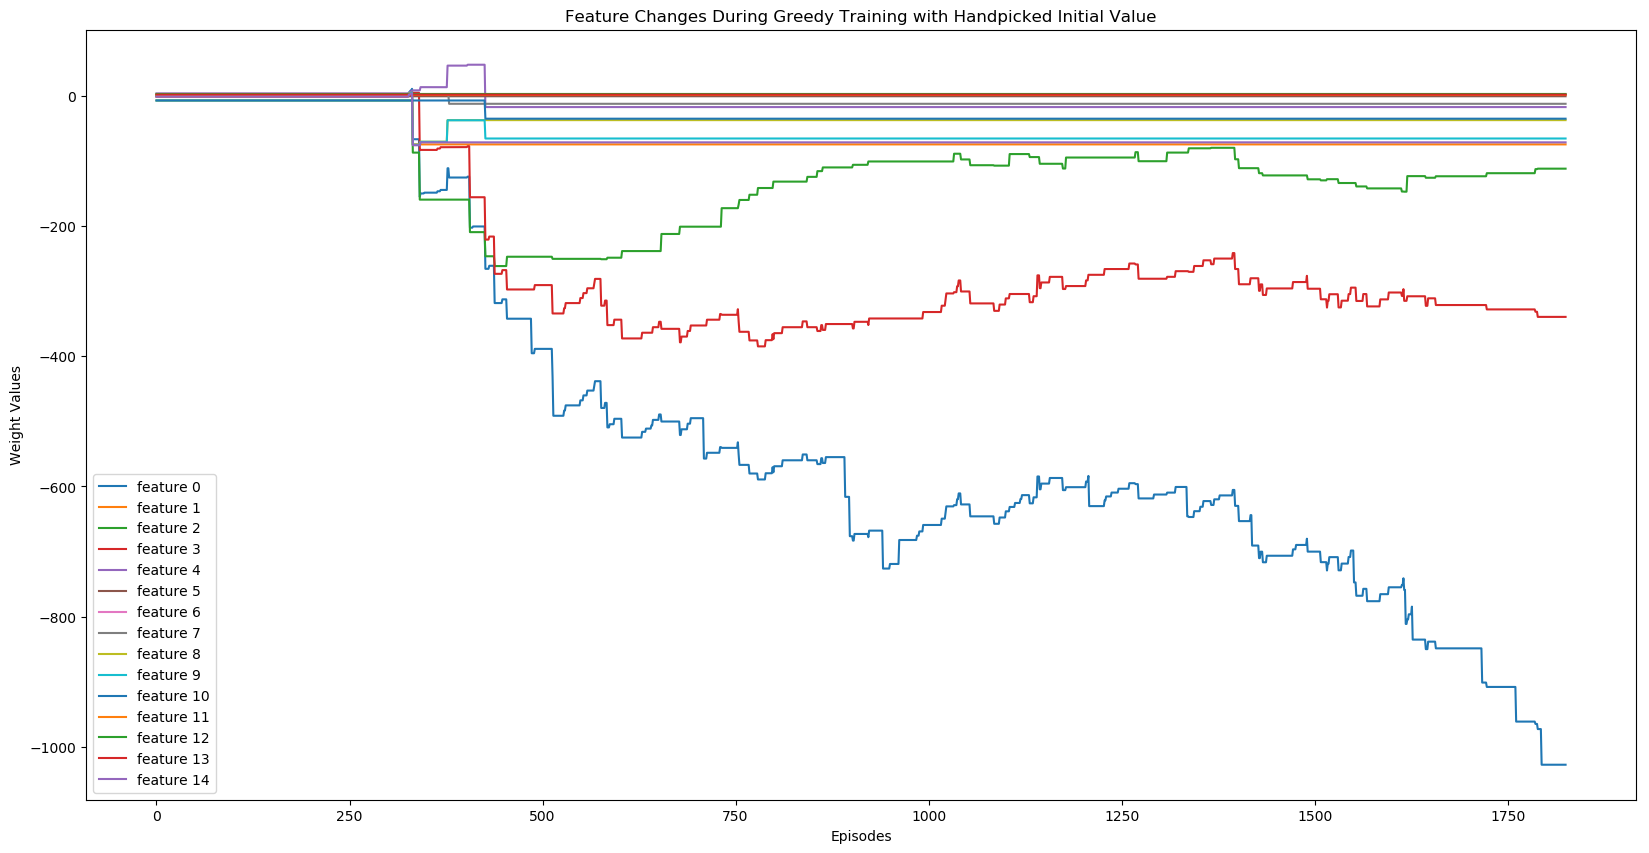

[-1.02756871e+03 -7.44745559e+01 -1.11756074e+02 -3.39502134e+02
 -1.71354769e+01 -5.03402159e-01  2.06331403e+00 -1.21009284e+01
 -3.71818555e+01 -6.54191613e+01 -3.49954072e+01  1.50000000e+00
  3.00000000e+00  1.99719780e+00 -7.13209860e+01]


In [45]:
y1 = np.load('training_res/res_2/train_weights_n_step_Greed_initX.npy')
y2 = np.load('training_res/res_2/train_rewards_n_step_Greed_initX.npy')
y1 = y1.reshape(1826, 15)
x = np.arange(1826)
#y[:,1000]

plt.figure(figsize=(20, 10))
for feat in range(15):
    plt.plot(x, y1[:,feat], label='feature {}'.format(feat))
#plt.plot(x,y2)
plt.title('Feature Changes During Greedy Training with Handpicked Initial Value')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/res_2/weights_n_step_Greed_initX.npy'))

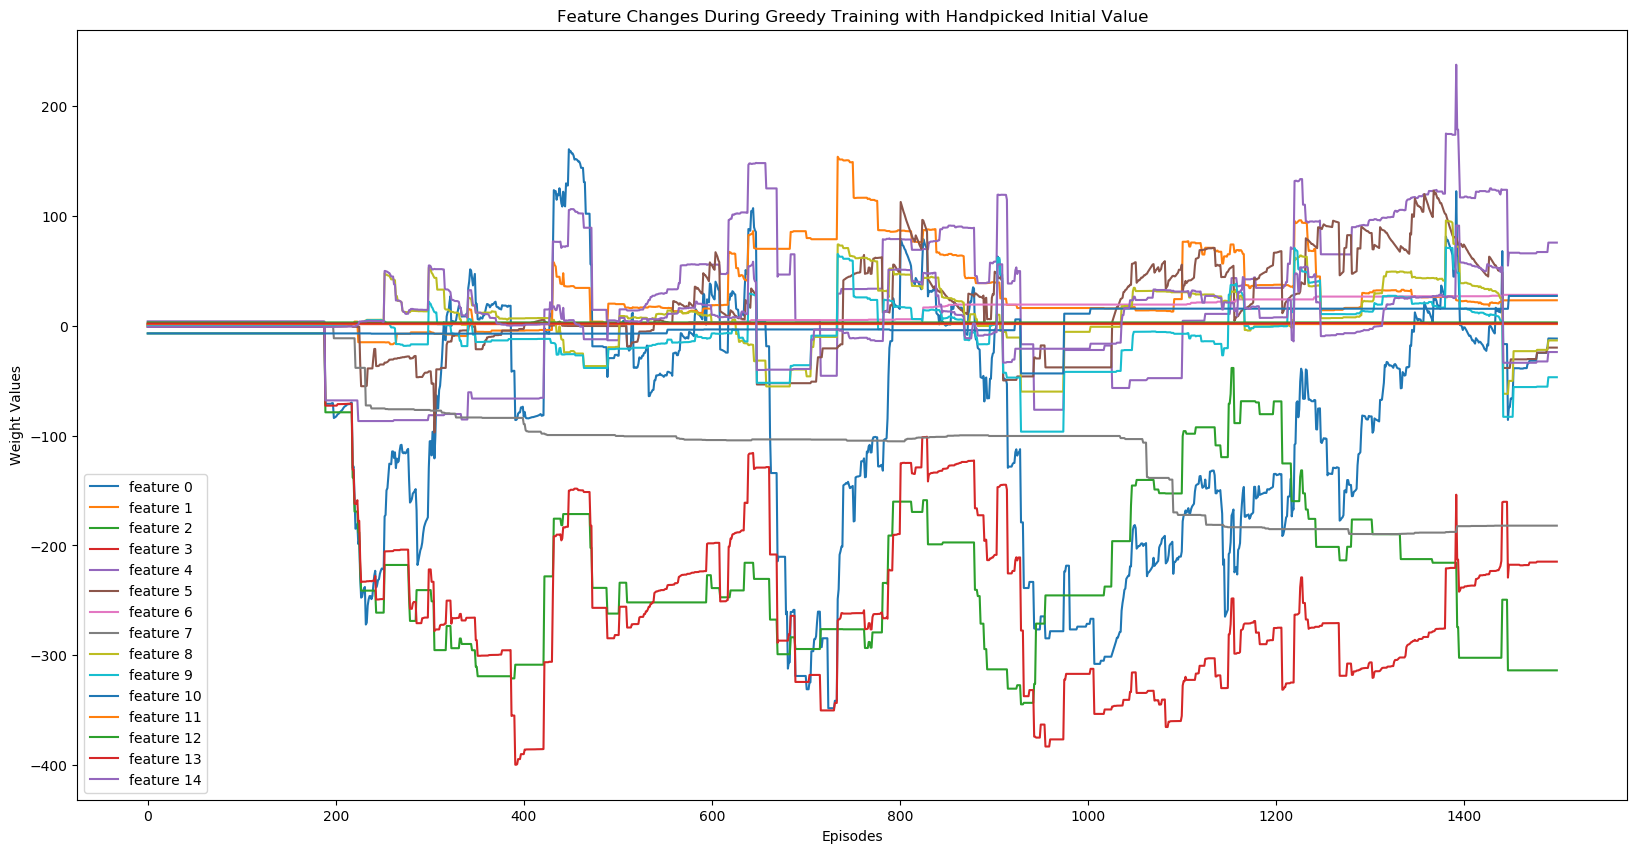

[ -71.73774553   15.14264926 -180.84139605 -319.38061157   49.05618512
   -4.77237085   29.7205833  -185.60802961   -8.0054124    11.23010646
   31.8063706     1.5           2.35983789    2.0723674     9.07158223]


In [55]:
y1 = np.load('training_res/res_2/train_weights_n_step_EpsGreed_initX.npy')
y2 = np.load('training_res/res_2/train_rewards_n_step_EpsGreed_initX.npy')
y1 = y1.reshape(2688, 15)
x = np.arange(1500)
#y[:,1000]

plt.figure(figsize=(20, 10))
for feat in range(15):
    plt.plot(x, y1[1000:2500,feat], label='feature {}'.format(feat))

plt.title('Feature Changes During Greedy Training with Handpicked Initial Value')
plt.xlabel('Episodes')
plt.ylabel('Weight Values')
plt.legend()
plt.show()
print(np.load('training_res/res_2/weights_n_step_EpsGreed_initX.npy'))